5


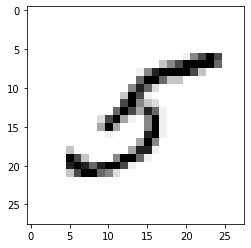

(60000, 28, 28)
(10000, 28, 28)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)     

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
import matplotlib.pyplot as plt

image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype(float)
x_test = x_test.astype(float)

x_train /= 255
x_test /= 255
from tensorflow.keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])
batch_size = 128
epochs = 10
model.summary()
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")



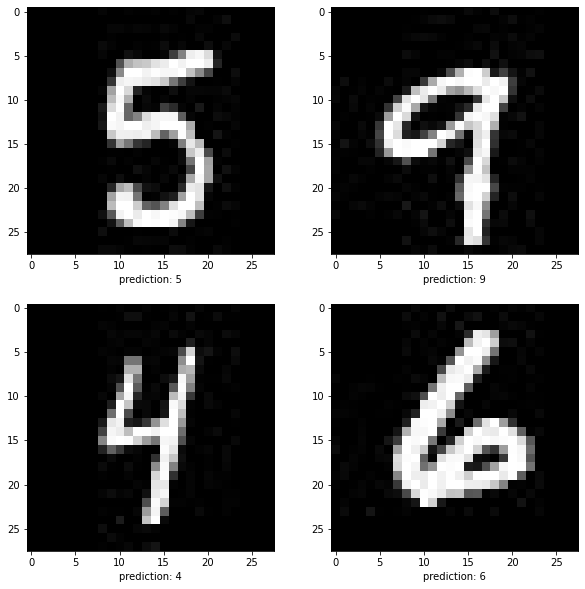

In [5]:
import imageio
import numpy as np
from matplotlib import pyplot as plt
img_rows, img_cols = 28, 28

from tensorflow.keras.models import load_model
model = load_model("test_model.h5")

img_list = [11, 21, 26, 35]
plt.rcParams["figure.figsize"]=(10,10)

for i,x in enumerate(img_list):
    gray = imageio.imread("testSample/img_{}.jpg".format(x))
    # gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
    plt.subplot(2,2,i+1)
    plt.imshow(gray, cmap = plt.get_cmap('gray'))
    
    gray = gray.reshape(1, img_rows, img_cols, 1)
    # normalize image
    gray=gray.astype(float)
    gray /= 255
    # predict digit
    prediction = model.predict(gray)
    plt.xlabel("prediction: {}".format(prediction.argmax()))

plt.show()

